In [ ]:
# librerías
import numpy as np
np.random.seed(2024)
from scipy import signal
from scipy.io import loadmat
import torch
torch.set_warn_always(False)
from keras.utils import to_categorical # type: ignore
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

$\underline{\text{Ejercicio } 1}$  
Implemente un perceptrón simple que aprenda la función lógica $\text{AND}$ y la función lógica $\text{OR}$, de $2$ y de $4$ entradas. Muestre la evolución del error durante el entrenamiento. Para el caso de $2$ dimensiones, grafique la recta discriminadora y todos los vectores de entrada de la red.

$\underline{\text{Solución:}}$  
Tabla de verdad del $\text{AND}$ de $2$ entradas:
| $x_1$ | $0$ | $0$ | $1$ | $1$ |
| :-: | :-: | :-: | :-: | :-: |
| $x_2$ | $0$ | $1$ | $0$ | $1$ |
| $\text{AND}(x_1,x_2)$ | $0$ | $0$ | $0$ | $1$ |

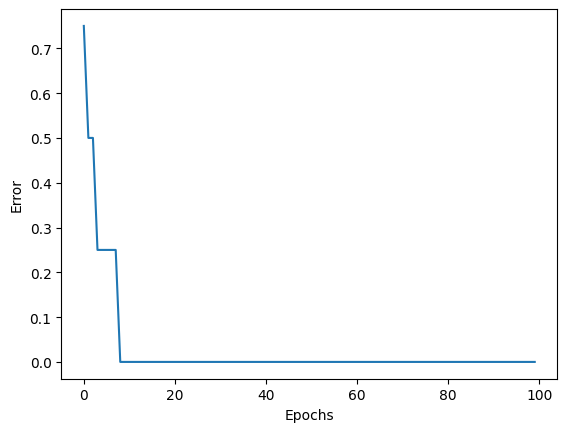

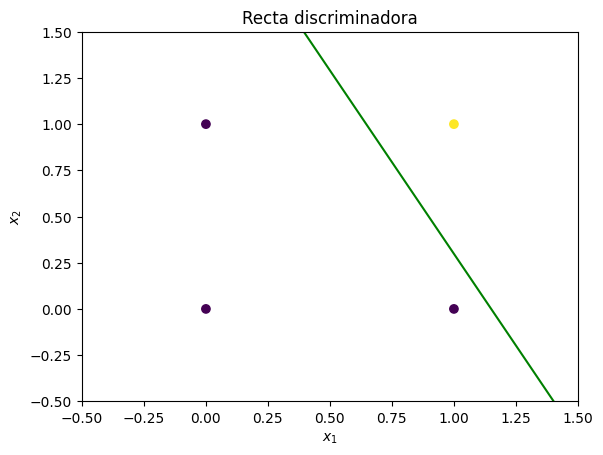

In [2]:
# and de dos entradas
X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2))
Y = np.reshape([0, 0, 0, 1], 4)

# inicializo los pesos aleatoriamente
weights = np.random.randn(3) # el peso extra es para el bias
predict = lambda x: 0 if np.tanh(np.dot(np.append(x, -1), weights)) < 0 else 1

# entrenamiento
def train_simple_perceptron(X, Y, epochs, learning_rate):
    errors = []
    for _ in range(epochs):
        errors.append(np.mean([predict(x) != y for x, y in zip(X, Y)]))
        for x, y in zip(X, Y):
            prediction = predict(x)
            if not prediction == y:
                for i in range(weights.size - 1):
                    weights[i] += learning_rate * (y - prediction) * x[i]
                weights[-1] += learning_rate * (y - prediction) * -1
    return errors

# mostrar los errores durante el entrenamiento
def plot_training_error(errors):
    plt.plot(range(len(errors)), errors)
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.show()

def plot_decision_boundary(weights, X, Y):
    # la recta discriminadora es x2 = -(w1 * x1 + b) / w2
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(weights[0] * x1 - weights[-1]) / weights[1]
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.plot(x1, x2, 'g-')
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Recta discriminadora')
    plt.show()

epochs = 100
learning_rate = 0.1
errors = train_simple_perceptron(X, Y, epochs, learning_rate)
plot_training_error(errors)
plot_decision_boundary(weights, X, Y)

Tabla de verdad del $\text{OR}$ de $2$ entradas:
| $x_1$ | $0$ | $0$ | $1$ | $1$ |
| :-: | :-: | :-: | :-: | :-: |
| $x_2$ | $0$ | $1$ | $0$ | $1$ |
| $\text{OR}(x_1,x_2)$ | $0$ | $1$ | $1$ | $1$ |

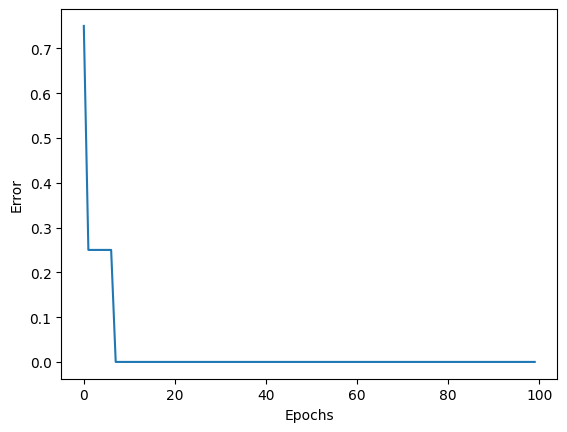

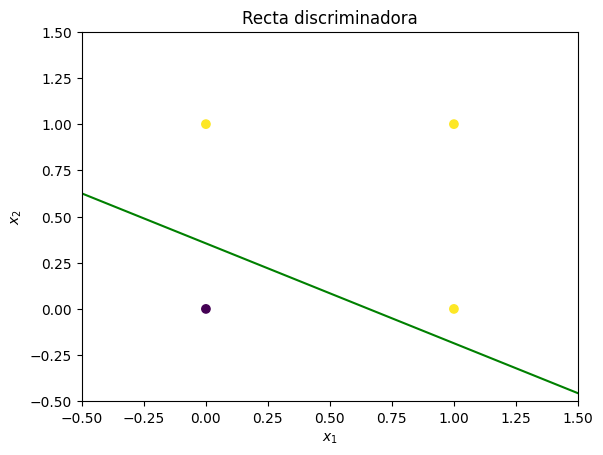

In [3]:
# or de dos entradas
X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2))
Y = np.reshape([0, 1, 1, 1], 4)

weights = np.random.randn(3)

epochs = 100
learning_rate = 0.1
errors = train_simple_perceptron(X, Y, epochs, learning_rate)
plot_training_error(errors)
plot_decision_boundary(weights, X, Y)

Tabla de verdad del $\text{AND}$ de $4$ entradas:
| $x_1$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| $x_2$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ |
| $x_3$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ |
| $x_4$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ |
| $\text{AND}(x_1,x_2,x_3,x_4)$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $1$ |

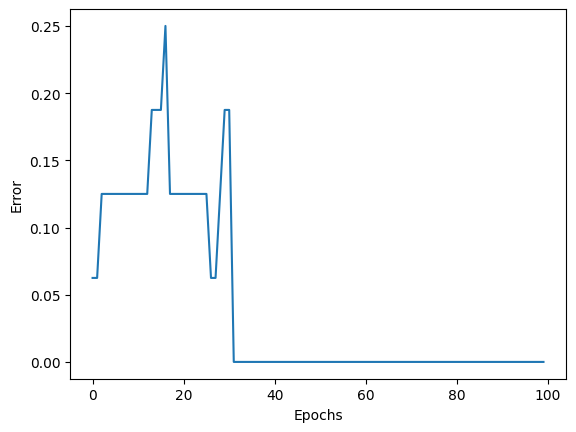

In [4]:
# and de cuatro entradas
X = np.reshape([list(x) for x in product([0, 1], repeat=4)], (16, 4))
Y = np.reshape([x1 * x2 * x3 * x4 for x1, x2, x3, x4 in X], 16)

weights = np.random.randn(5)

epochs = 100
learning_rate = 0.1
errors = train_simple_perceptron(X, Y, epochs, learning_rate)
plot_training_error(errors)

Tabla de verdad del $\text{OR}$ de $4$ entradas:
| $x_1$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| $x_2$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ |
| $x_3$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ |
| $x_4$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ |
| $\text{OR}(x_1,x_2,x_3,x_4)$ | $0$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ |

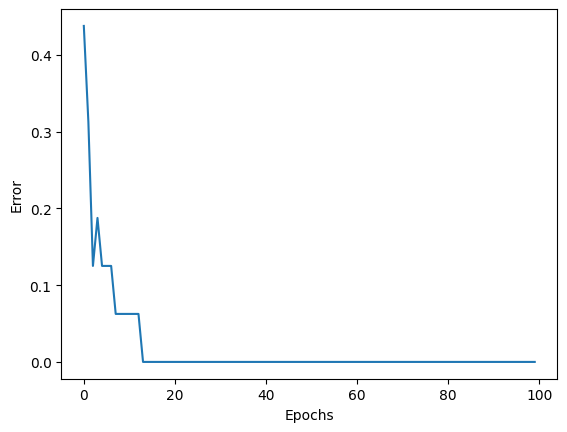

In [5]:
# or de cuatro entradas
X = np.reshape([list(x) for x in product([0, 1], repeat=4)], (16, 4))
Y = np.reshape([x1 + x2 + x3 + x4 > 0 for x1, x2, x3, x4 in X], 16)

weights = np.random.randn(5)

epochs = 100
learning_rate = 0.1
errors = train_simple_perceptron(X, Y, epochs, learning_rate)
plot_training_error(errors)

$\underline{\text{Ejercicio } 2}$  
Determine numéricamente cómo varía la capacidad del perceptrón simple en función del número de patrones enseñados.

$\underline{\text{Ejercicio } 3}$  
Implemente un perceptrón multicapa que aprenda la función lógica $\text{XOR}$ de $2$ y de $4$ entradas (utilizando el algoritmo Backpropagation y actualizando en batch). Muestre cómo evoluciona el error durante el entrenamiento.

$\underline{\text{Solución:}}$  

In [ ]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    def forward(self, input):
        # TODO: calcular el output y devolverlo
        pass
    def backward(self, output_gradient, learning_rate):
        # TODO: actualizar los parámetros y devolver el gradiente del input
        pass

class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)
    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias
    def backward(self, output_gradient, learning_rate):
        weights_gradient = np.dot(output_gradient, self.input.T)
        input_gradient = np.dot(self.weights.T, output_gradient)
        self.weights -= training_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return input_gradient

class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    def forward(self, input):
        self.input = input
        return self.activation(self.input)
    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x) ** 2
        super().__init__(tanh, tanh_prime)

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

Tabla de verdad del $\text{XOR}$ de $2$ entradas:
| $x_1$ | $0$ | $0$ | $1$ | $1$ |
| :-: | :-: | :-: | :-: | :-: |
| $x_2$ | $0$ | $1$ | $0$ | $1$ |
| $\text{XOR}(x_1,x_2)$ | $0$ | $1$ | $1$ | $0$ |

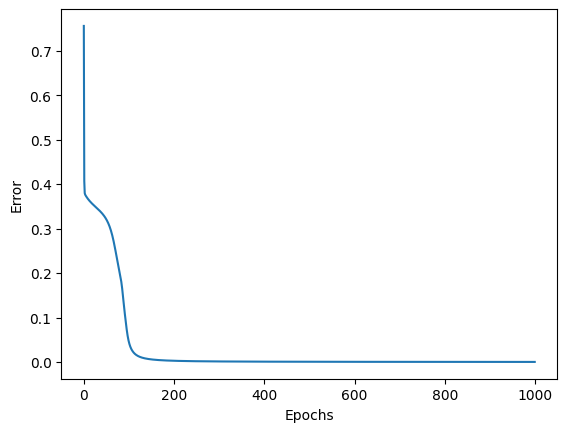

In [7]:
# xor de dos entradas
X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

multilayer_perceptron = [
    Dense(2, 3),
    Tanh(),
    Dense(3, 1),
    Tanh()
]

def predict(network, input):
    output = input
    # forward de cada capa
    for layer in network:
        output = layer.forward(output)
    return output

# entrenamiento
def train_multilayer_perceptron(network, loss, loss_prime, X_train, Y_train, epochs, learning_rate, batch_size):
    errors = []
    for _ in range(epochs):
        error = 0
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            Y_batch = Y_train[i:i + batch_size]
            batch_error = 0
            for x, y in zip(X_batch, Y_batch):
                # forward
                output = predict(network, x)
                batch_error += loss(y, output)
                # backpropagation para obtener el gradiente
                grad = loss_prime(y, output)
                for layer in reversed(network):
                    grad = layer.backward(grad, learning_rate) # calculo el gradiente por capa
            error += batch_error / batch_size
        error /= (len(X_train) / batch_size)
        errors.append(error)
    return errors

epochs = 1000
learning_rate = 0.1
batch_size = 2
errors = train_multilayer_perceptron(multilayer_perceptron, mse, mse_prime, X, Y, epochs, learning_rate, batch_size)
plot_training_error(errors)

Tabla de verdad del $\text{XOR}$ de $4$ entradas:
| $x_1$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ | $1$ |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| $x_2$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ | $0$ | $0$ | $0$ | $0$ | $1$ | $1$ | $1$ | $1$ |
| $x_3$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $1$ |
| $x_4$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ | $0$ | $1$ |
| $\text{XOR}(x_1,x_2,x_3,x_4)$ | $0$ | $1$ | $1$ | $0$ | $1$ | $0$ | $0$ | $1$ | $1$ | $0$ | $0$ | $1$ | $0$ | $1$ | $1$ | $0$ |

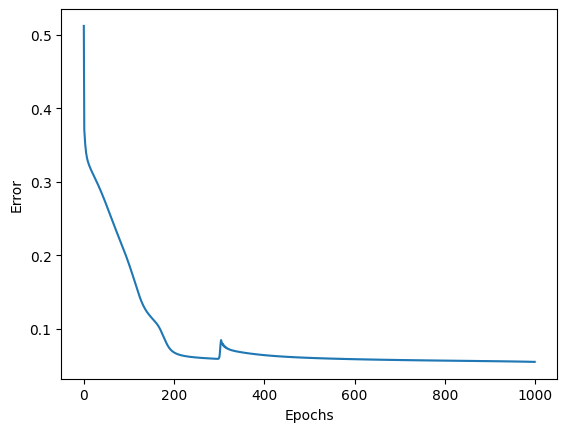

In [8]:
# xor de cuatro entradas
X = np.reshape([list(x) for x in product([0, 1], repeat=4)], (16, 4, 1))
Y = np.reshape([x1 ^ x2 ^ x3 ^ x4 for x1, x2, x3, x4 in X], (16, 1, 1))

multilayer_perceptron = [
    Dense(4, 5),
    Tanh(),
    Dense(5, 1),
    Tanh()
]

epochs = 1000
learning_rate = 0.05
batch_size = 4
errors = train_multilayer_perceptron(multilayer_perceptron, mse, mse_prime, X, Y, epochs, learning_rate, batch_size)
plot_training_error(errors)

$\underline{\text{Ejercicio } 4}$  
$\text{a}$.  Implemente una red con aprendizaje Backpropagation que aprenda la siguiente función:
$$
f(x,y,z) = \sin x + \cos y + z,
$$
donde $x$ e $y \in [0,2\pi]$  y $z \in [-1,1]$. Para ello construya un conjunto de datos de entrenamiento y un conjunto de evaluación. Muestre la evolución del error de entrenamiento y de evaluación en función de las épocas de entrenamiento.  

$\text{b}$. Estudie la evolución de los errores durante el entrenamiento de una red con una capa oculta de $30$ neuronas cuando el conjunto de entrenamiento contiene $40$ muestras. ¿Qué ocurre si el minibatch tiene tamaño $40$? ¿Y si tiene tamaño $1$?

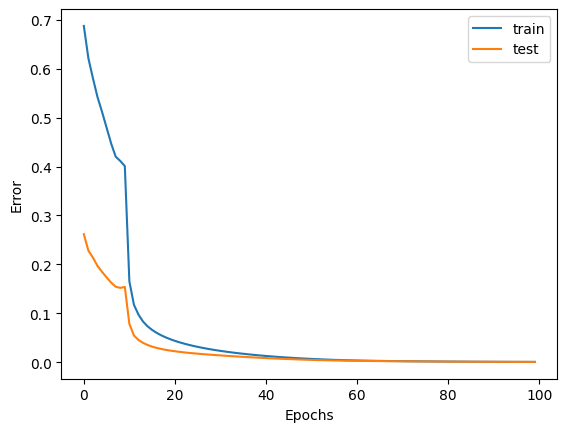

In [9]:
# genero los datos
X = np.array([[x, y, z] for x, y, z in zip(np.linspace(0, 2*np.pi, 100),
                                           np.linspace(0, 2*np.pi, 100),
                                           np.linspace(-1, 1, 100))]).reshape(100, 3, 1)
Y = np.array([np.sin(x) + np.cos(y) + z for x, y, z in X]).reshape(100, 1, 1)

# desordeno los datos antes de separar train y test
indices = np.random.permutation(X.shape[0])  # Generar permutación aleatoria
X_shuffled = X[indices]
Y_shuffled = Y[indices]

# asigno el 80% de los datos para entrenamiento y el 20% para test
X_train, Y_train = X_shuffled[:80], Y_shuffled[:80]
X_test, Y_test = X_shuffled[80:], Y_shuffled[80:]

multilayer_perceptron = [
    Dense(3, 9),
    Tanh(),
    Dense(9, 1),
    # Tanh()
    # Dense(15, 1),
    # Tanh()
]

# modifico el entrenamiento para coleccionar también los errores en el conjunto de evaluación
def train_multilayer_perceptron(network, loss, loss_prime, X_train, Y_train, X_test, Y_test, epochs, learning_rate, batch_size):
    errors_train = []
    errors_test = []
    for _ in range(epochs):
        error = 0
        for i in range(0, len(X_train), batch_size):
            X_batch = X_train[i:i + batch_size]
            Y_batch = Y_train[i:i + batch_size]
            batch_error = 0
            for x, y in zip(X_batch, Y_batch):
                # forward
                output = predict(network, x)
                batch_error += loss(y, output)
                # backpropagation para obtener el gradiente
                grad = loss_prime(y, output)
                for layer in reversed(network):
                    grad = layer.backward(grad, learning_rate) # calculo el gradiente por capa
            error += batch_error / batch_size
        error /= (len(X_train) / batch_size)
        error_train = np.mean(loss(Y_train, [predict(multilayer_perceptron, x) for x in X_train]))
        error_test = np.mean(loss(Y_test, [predict(multilayer_perceptron, x) for x in X_test]))
        errors_train.append(error_train)
        errors_test.append(error_test)
    return errors_train, errors_test

# modifico tamibén la función para graficar los errores para que muestre los dos errores
def plot_training_error(errors_train, errors_test):
    plt.plot(range(len(errors_train)), errors_train, label='train')
    plt.plot(range(len(errors_test)), errors_test, label='test')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

epochs = 100
learning_rate = 0.005
batch_size = 4
errors_train, errors_test = train_multilayer_perceptron(multilayer_perceptron, mse, mse_prime, X_train, Y_train, X_test, Y_test, epochs, learning_rate, batch_size)
plot_training_error(errors_train, errors_test)

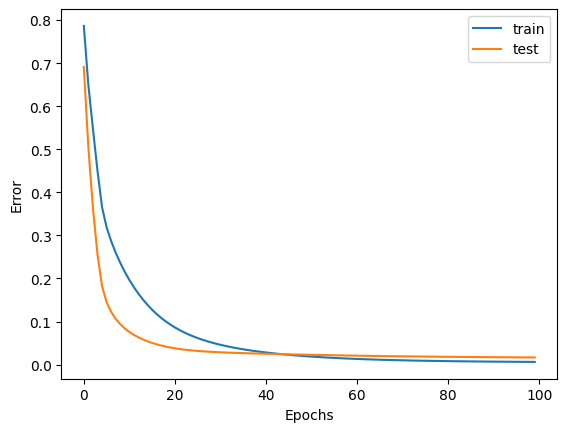

In [10]:
# tomo una muestra de 40 datos para entrenar
indices = np.random.choice(X_train.shape[0], 40, replace=False)
X_train, Y_train = X_train[indices], Y_train[indices]

# una sóla capa oculta con 30 neuronas
multilayer_perceptron = [
    Dense(3, 30),
    Tanh(),
    Dense(30, 1),
]

epochs = 100
learning_rate = 0.005
batch_size = 40
errors_train, errors_test = train_multilayer_perceptron(multilayer_perceptron, mse, mse_prime, X_train, Y_train, X_test, Y_test, epochs, learning_rate, batch_size)
plot_training_error(errors_train, errors_test)

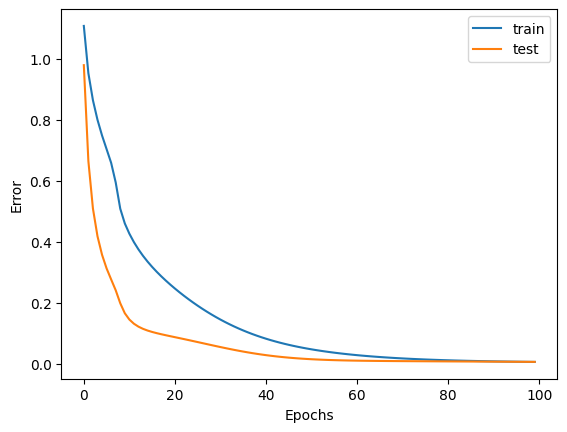

In [11]:
multilayer_perceptron = [
    Dense(3, 30),
    Tanh(),
    Dense(30, 1),
]

# ahora con batch_size = 1
batch_size = 1
errors_train, errors_test = train_multilayer_perceptron(multilayer_perceptron, mse, mse_prime, X_train, Y_train, X_test, Y_test, epochs, learning_rate, batch_size)
plot_training_error(errors_train, errors_test)

$\underline{\text{Ejercicio } 5}$  
Siguiendo el trabajo de Hinton y Salakhutdinov ($2006$), entrene una máquina restringuida de Boltzmann con imágenes de la base de datos MNIST. Muestre el error de reconstrucción durante el entrenamiento, y ejemplos de cada uno de los dígitos reconstruidos.

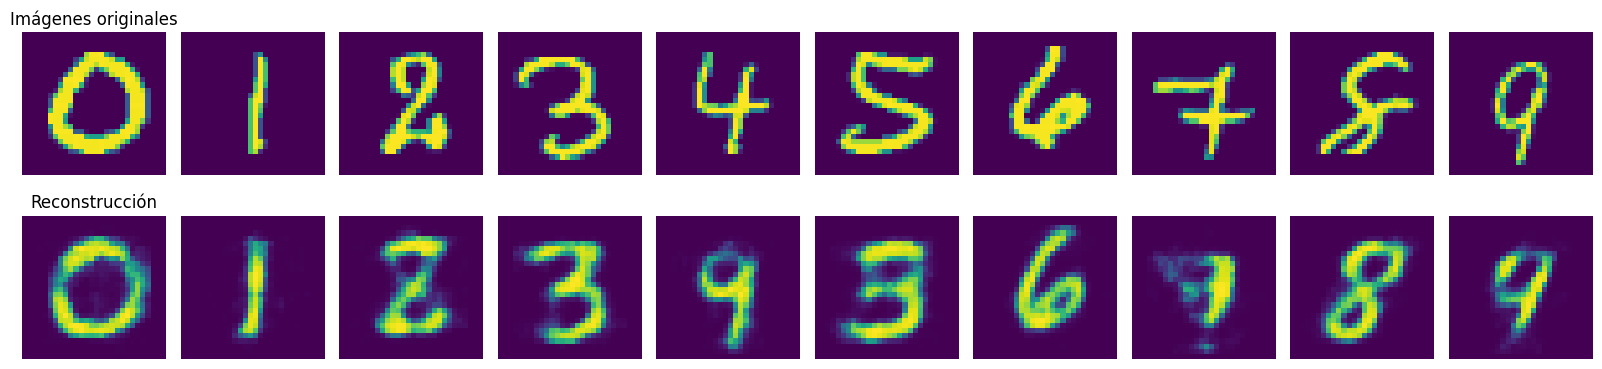

In [26]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Boltzmann(Layer):
                   # visible_size, hidden_size
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.weights = np.random.normal(0, 0.01, (input_size, output_size))
        self.visible_bias = np.random.randn(input_size)
        self.bias = np.random.randn(output_size) # hidden bias
    def train(self, train, epochs, learning_rate):
        for _ in range(epochs):
            frequency_train = np.zeros((self.input_size, self.output_size))  # v_i y h_j activados en los datos
            frequency_recon = np.zeros((self.input_size, self.output_size))  # v_i y h_j activados en confabulaciones
            # estadísticas de los sesgos
            delta_visible_bias_train = np.zeros(self.input_size) # frecuencia de activación de las unidades visibles en los datos
            delta_visible_bias_recon = np.zeros(self.input_size) # frecuencia de activación de las unidades visibles en las confabulaciones
            delta_hidden_bias_train = np.zeros(self.output_size)
            delta_hidden_bias_recon = np.zeros(self.output_size)
            for t in train:
                # train
                self.input = t
                hidden_probability = sigmoid(self.bias + np.dot(self.input, self.weights))
                self.output = np.random.rand(*hidden_probability.shape) < hidden_probability
                frequency_train += np.outer(self.input, self.output)
                # confabulaciones
                visible_probability = sigmoid(self.visible_bias + np.dot(self.output, self.weights.T))
                # recon_v = p_v
                visible_recon = np.random.rand(*visible_probability.shape) < visible_probability
                hidden_recon_probability = sigmoid(self.bias +  np.dot(visible_recon, self.weights))
                hidden_recon = np.random.rand(*hidden_recon_probability.shape) < hidden_recon_probability
                frequency_recon += np.outer(visible_recon, hidden_recon)
                delta_visible_bias_train += t
                delta_visible_bias_recon += visible_recon
                delta_hidden_bias_train += hidden_probability
                delta_hidden_bias_recon += hidden_recon_probability
            # normalizo las estadísticas
            frequency_train /= len(train)
            frequency_recon /= len(train)
            delta_visible_bias_train /= len(train)
            delta_visible_bias_recon /= len(train)
            delta_hidden_bias_train /= len(train)
            delta_hidden_bias_recon /= len(train)
            # actualizo los pesos y los sesgos
            self.weights += learning_rate * (frequency_train - frequency_recon)
            self.visible_bias += learning_rate * (delta_visible_bias_train - delta_visible_bias_recon)
            self.bias += learning_rate * (delta_hidden_bias_train - delta_hidden_bias_recon)
    def pre_forward(self, x):
        v = x
        hidden_probability = sigmoid(self.bias + np.dot(v, self.weights))
        v = np.random.rand(*hidden_probability.shape) < hidden_probability
        return v
    def pre_backward(self, x):
        v = x
        visible_probability = sigmoid(self.visible_bias + np.dot(x, self.weights.T)) # v logísticas
        return visible_probability
    def forward(self, x):
        self.input = x
        hidden_probability = sigmoid(self.bias + np.dot(self.input, self.weights))
        self.output = np.random.rand(*hidden_probability.shape) < hidden_probability
        self.input = sigmoid(self.visible_bias + np.dot(self.output, self.weights.T))  # unidades visibles logísticas para mnist
        return self.output

def pretrain_boltzmann_machine(network, train, epochs, learning_rate):
        v = train
        for layer in network:
            layer.train(v, epochs, learning_rate)
            v = [layer.forward(t) for t in v]

def sample(network, x):
    # forward
    v = x
    for layer in network:
        v = layer.pre_forward(v)
    # backward
    for layer in reversed(network):
        v = layer.pre_backward(v)
    return v

# mnist sin labels
# normalizo los datos
train = loadmat("data/rbm/datosTrain.mat")["data"] / 255
test = loadmat("data/rbm/datosTest.mat")["data"] / 255

restricted_boltzmann_machine = [
    Boltzmann(784, 400),
    Boltzmann(400, 200),
    Boltzmann(200, 100)
    # Boltzmann(100, 10),
]

epochs = 1000
learning_rate = 0.05
pretrain_boltzmann_machine(restricted_boltzmann_machine, train, epochs, learning_rate)

# muestro las imágenes originales del test y sus reconstrucciones
def plot_reconstructions(restricted_boltzmann_machine, test):
    fig, axes = plt.subplots(2, 10, figsize=(16, 4))
    axes[0, 0].set_title('Imágenes originales')
    axes[1, 0].set_title('Reconstrucción')
    for i in range(10):
        x = test[i*20]
        reconstruction = sample(restricted_boltzmann_machine, x)
        # imagen original
        axes[0, i].imshow(x.reshape(28, 28))
        axes[0, i].axis('off')
        # reconstrucción
        axes[1, i].imshow(reconstruction.reshape(28, 28))
        axes[1, i].axis('off')
    plt.tight_layout()
    plt.show()

plot_reconstructions(restricted_boltzmann_machine, test)

$\underline{\text{Ejercicio } 6}$  
Entrene una red convolucional para clasificar las imágenes de la base de datos MNIST. ¿Cuál es la red convolucional más pequeña que puede conseguir con una exactitud de al menos $90%$ en el conjunto de evaluación? ¿Cuál es el perceptrón multicapa más pequeño que puede conseguir con la misma exactitud?

In [ ]:
class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        input_depth, input_height, input_width = input_shape
        self.depth = depth
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size)
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(*self.output_shape)
    def forward(self, input):
        self.input = input
        self.output = np.copy(self.biases)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += signal.correlate2d(self.input[j], self.kernels[i, j], "valid")
        return self.output
    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)
        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = signal.correlate2d(self.input[j], output_gradient[i], "valid")
                input_gradient[j] += signal.convolve2d(output_gradient[i], self.kernels[i, j], "full")
        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * output_gradient
        return input_gradient

class Reshape(Layer):
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape
    def forward(self, input):
        return np.reshape(input, self.output_shape)
    def backward(self, output_gradient, learning_rate):
        return np.reshape(output_gradient, self.input_shape)

class Sigmoid(Activation):
    def __init__(self):
        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)
        super().__init__(sigmoid, sigmoid_prime)

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

# cargar datos
def preprocess_data(x, y, limit):
    all_indices = np.arange(len(x))
    all_indices = np.random.permutation(all_indices)
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype("float32") / 255
    y = to_categorical(y, 10)
    y = y.reshape(len(y), 10, 1)
    return x, y

x_train = torch.load('data/conv/MNIST_training_data.pt', weights_only=True).numpy()
y_train = torch.load('data/conv/MNIST_training_labels.pt', weights_only=True).numpy()
x_test = torch.load('data/conv/MNIST_test_data.pt', weights_only=True).numpy()
y_test = torch.load('data/conv/MNIST_test_labels.pt', weights_only=True).numpy()

x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 100)

# neural network
network = [
    Convolutional((1, 28, 28), 3, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 10),
    Sigmoid()
]

def train(network, loss, loss_prime, x_train, y_train, epochs = 1000, learning_rate = 0.01):
    erros = []
    for e in range(epochs):
        error = 0
        for x, y in zip(x_train, y_train):
            # forward
            output = predict(network, x)
            # error
            error += loss(y, output)
            # backward
            grad = loss_prime(y, output)
            for layer in reversed(network):
                grad = layer.backward(grad, learning_rate)
        error /= len(x_train)
        errors.append(error)
    return errors

def predict(network, input):
    output = input
    for layer in network:
        output = layer.forward(output)
    return output

# train
errors = train(network, binary_cross_entropy, binary_cross_entropy_prime, x_train, y_train, epochs=20, learning_rate=0.1)

# test
for x, y in zip(x_test, y_test):
    output = predict(network, x)
    print(f"pred: {np.argmax(output)}, true: {np.argmax(y)}")

pred: 7, true: 7
pred: 2, true: 2
pred: 1, true: 1
pred: 0, true: 0
pred: 4, true: 4
pred: 1, true: 1
pred: 4, true: 4
pred: 9, true: 9
pred: 6, true: 5
pred: 9, true: 9
pred: 0, true: 0
pred: 6, true: 6
pred: 9, true: 9
pred: 0, true: 0
pred: 1, true: 1
pred: 5, true: 5
pred: 9, true: 9
pred: 7, true: 7
pred: 8, true: 3
pred: 4, true: 4
pred: 9, true: 9
pred: 6, true: 6
pred: 6, true: 6
pred: 5, true: 5
pred: 4, true: 4
pred: 0, true: 0
pred: 7, true: 7
pred: 4, true: 4
pred: 0, true: 0
pred: 1, true: 1
pred: 3, true: 3
pred: 1, true: 1
pred: 3, true: 3
pred: 0, true: 4
pred: 7, true: 7
pred: 2, true: 2
pred: 7, true: 7
pred: 1, true: 1
pred: 2, true: 2
pred: 1, true: 1
pred: 1, true: 1
pred: 7, true: 7
pred: 4, true: 4
pred: 2, true: 2
pred: 3, true: 3
pred: 5, true: 5
pred: 1, true: 1
pred: 2, true: 2
pred: 4, true: 4
pred: 4, true: 4
pred: 6, true: 6
pred: 3, true: 3
pred: 5, true: 5
pred: 5, true: 5
pred: 6, true: 6
pred: 0, true: 0
pred: 4, true: 4
pred: 1, true: 1
pred: 9, true:

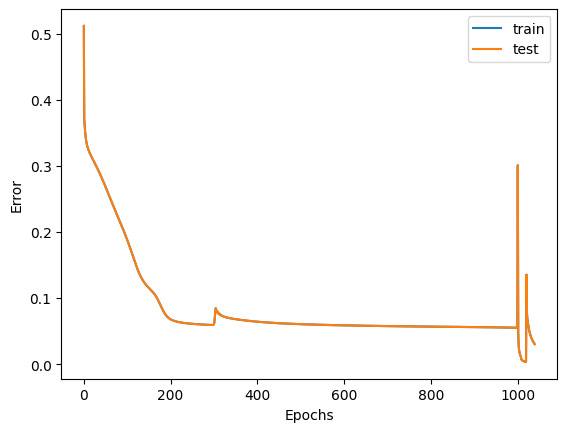

In [33]:
plot_training_error(errors, errors)

$\underline{\text{Ejercicio } 7}$  
Entrene un autoencoder para obtener una representación de baja dimensionalidad de las imágenes de MNIST. Use dichas representaciones para entrenar un perceptrón multicapa como clasificador. ¿Cuál es el tiempo de entrenamiento y la exactitud del clasificador obtenido cuando parte de la representación del autoencoder, en comparación con lo obtenido usando las imágenes originales?